In [1]:
import numpy as np
from fst.io import read
import matplotlib.pyplot as plt
import dask.array as da
from scipy.ndimage.interpolation import map_coordinates
%matplotlib inline

In [2]:
dset = read('/groups/cosem/cosem/data/TWalther_WT45_Cell2_4x4x4nm/Cryo_20171009_WT45_Cell2_4x4x4nm.n5/volumes/raw')
arr = da.from_array(dset)

In [3]:
origin = -500 + np.array(arr.shape) //  2
size = (501,) * len(origin)
tmp = arr[tuple(slice(o, o+s) for o,s in zip(origin, size))].compute()

In [21]:
a = arr[0,0,:]

In [15]:
list(map(lambda v: v + 1, [0,1,2,4]))

[1, 2, 3, 5]

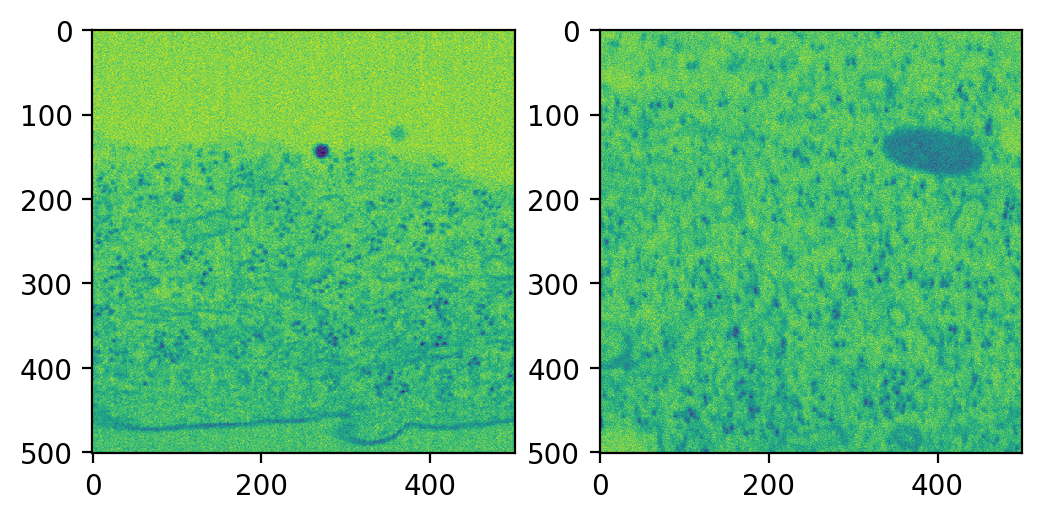

In [4]:
fig, axs = plt.subplots(dpi=200, ncols=2)
axs[0].imshow(tmp[tmp.shape[0]//2])
axs[1].imshow(tmp[:,tmp.shape[1]//2])

In [82]:
def powr(arr):
    return np.fft.fftshift(np.log(np.abs(np.fft.fft2(arr))))

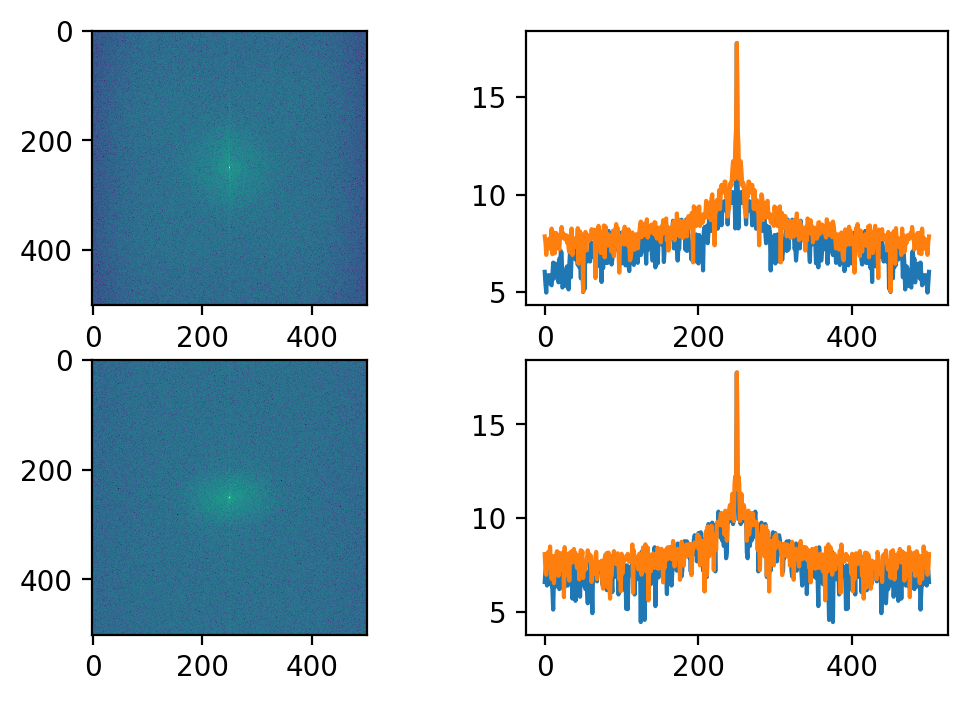

In [88]:
from scipy.stats import zscore
fig, axs = plt.subplots(dpi=200, ncols=2, nrows=2)
ffn = powr(tmp[tmp.shape[0]//2])
axs[0,0].imshow(ffn)
axs[0,1].plot(ffn[ffn.shape[0]//2])
axs[0,1].plot(ffn[:,ffn.shape[1]//2])
ffn = powr(tmp[:,tmp.shape[1]//2])
axs[1,0].imshow(ffn, clim=axs[0,0].images[0].get_clim())
axs[1,1].plot(ffn[ffn.shape[0]//2, :])
axs[1,1].plot(ffn[:, ffn.shape[1]//2])

In [84]:
from scipy.signal import hamming

In [91]:
mask = np.outer(hamming(tmp.shape[0]), hamming(tmp.shape[0]))
ffn_xy = np.array([powr(t * mask ) for t in tmp]).mean(0)
ffn_zy = np.array([powr(t * mask ) for t in tmp.transpose(1,0,2)]).mean(0)

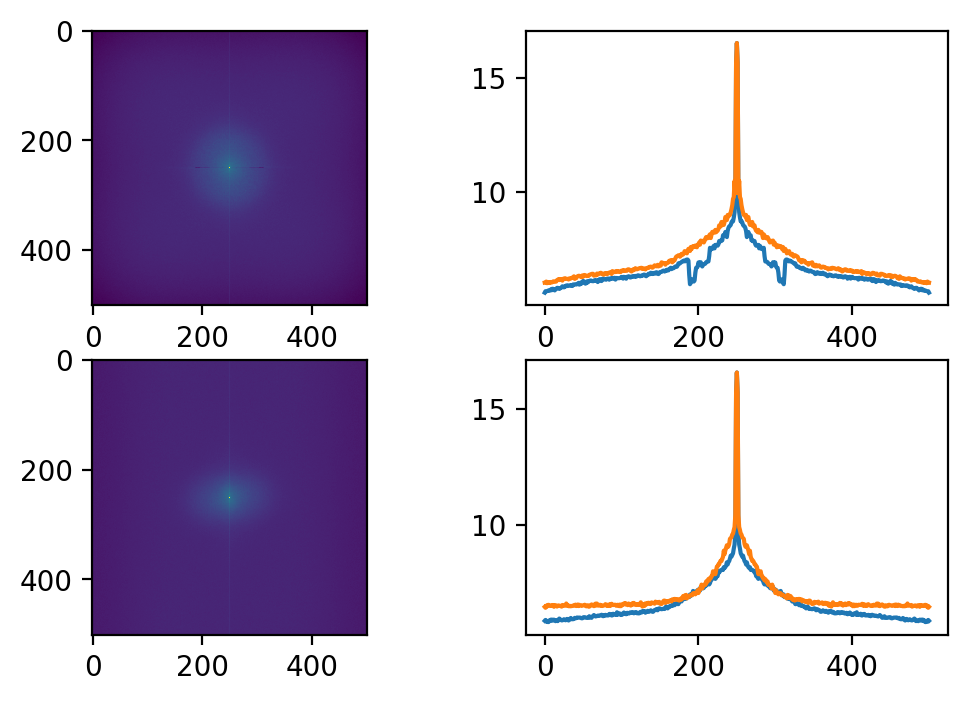

In [92]:
from scipy.stats import zscore
fig, axs = plt.subplots(dpi=200, ncols=2, nrows=2)
axs[0,0].imshow(ffn_xy)
axs[0,1].plot(ffn_xy[ffn_xy.shape[0]//2])
axs[0,1].plot(ffn_xy[:,ffn_xy.shape[1]//2])

axs[1,0].imshow(ffn_zy, clim=axs[0,0].images[0].get_clim())
axs[1,1].plot(ffn_zy[ffn_zy.shape[0]//2, :])
axs[1,1].plot(ffn_zy[:, ffn_zy.shape[1]//2])